## Importing **libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Drop unnecesary cells

In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### dataset information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Renaming columns

In [ ]:
df.columns=['label','message']

### Encoding labels

In [ ]:
df['label']=df['label'].map({'ham':0,'spam':1})

In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Count of empty strings in 'message'
empty_count = (df['message'].str.strip() == '').sum()
print(f"Number of empty messages: {empty_count}")

Number of empty messages: 0


## visualization

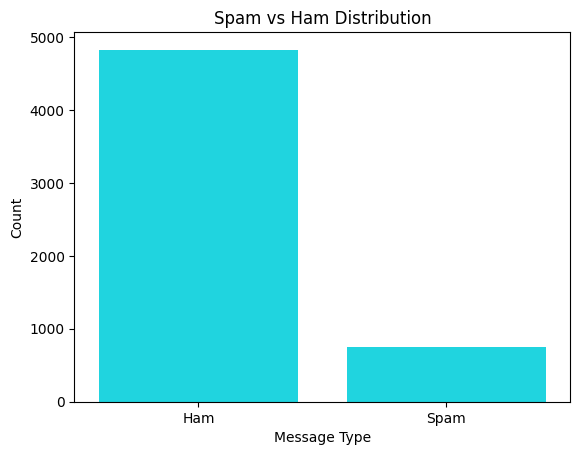

In [ ]:
sns.countplot(x='label',data=df,color ='#00f0ff')
plt.title("Spam vs Ham Distribution")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.xticks([0,1], ['Ham', 'Spam'])
plt.show()

In [ ]:
df['message_length'] = df['message'].apply(len)

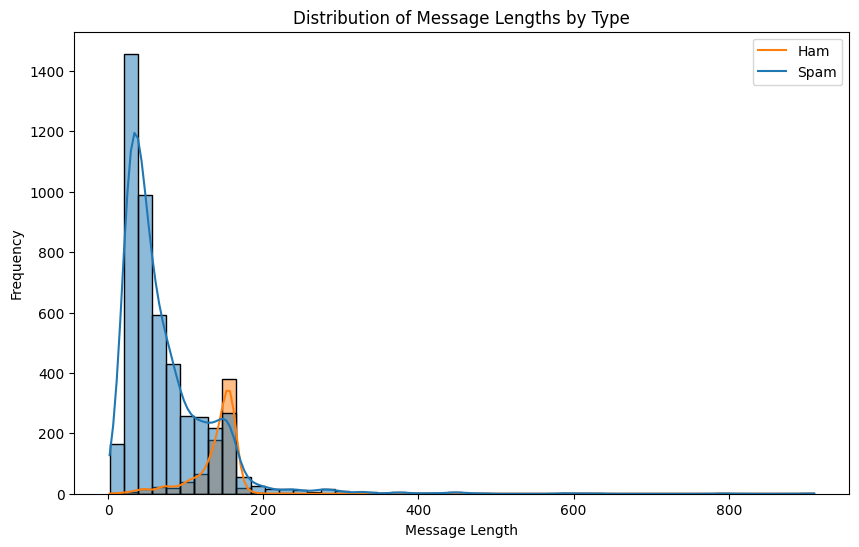

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title("Distribution of Message Lengths by Type")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.legend(labels=['Ham', 'Spam'])
plt.show()


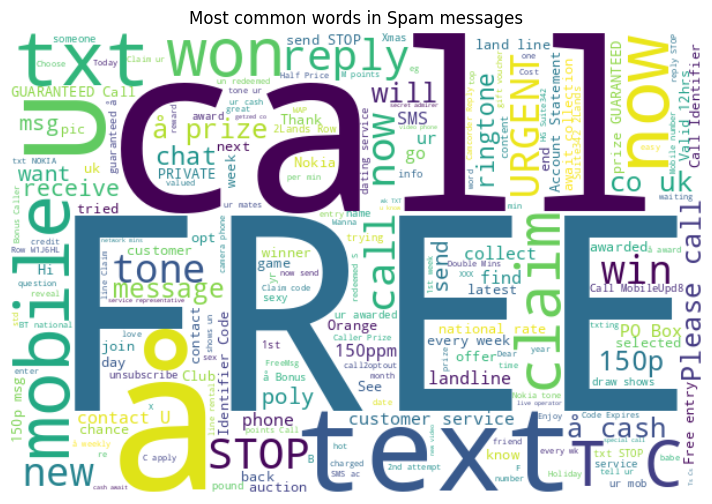

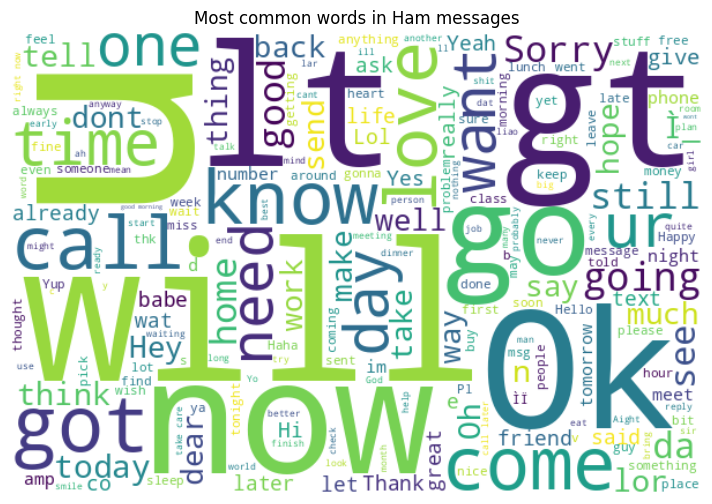

In [ ]:
from wordcloud import WordCloud

spam_words = ' '.join(df[df['label'] == 1]['message'])
ham_words = ' '.join(df[df['label'] == 0]['message'])

# Spam Word Cloud
spam_wc = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
plt.figure(figsize=(10,6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most common words in Spam messages")
plt.show()

# Ham Word Cloud
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(10,6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most common words in Ham messages")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
x=df['message']
y=df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## Naive Bayes Classifier pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe= Pipeline([('tfidf',TfidfVectorizer()),('clf',MultinomialNB())])

In [ ]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
y_pred=pipe.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[965   0]
 [ 42 108]]


In [ ]:
print(accuracy_score(y_test,y_pred))

0.9623318385650225


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Logistic Regression pipeline

In [75]:
pipe= Pipeline([('tfidf',TfidfVectorizer()),('log_reg',LogisticRegression())])

In [76]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('log_reg', LogisticRegression())])

In [77]:
y_pred=pipe.predict(x_test)

In [78]:
print(confusion_matrix(y_test,y_pred))

[[964   1]
 [ 35 115]]


In [79]:
print(accuracy_score(y_test,y_pred))

0.967713004484305


##  Support Vector classifier pipeline

In [80]:
pipe= Pipeline([('tfidf',TfidfVectorizer()),('svc',SVC())])

In [81]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [82]:
y_pred=pipe.predict(x_test)

In [83]:
print(confusion_matrix(y_test,y_pred))

[[965   0]
 [ 20 130]]


In [84]:
print(accuracy_score(y_test,y_pred))

0.9820627802690582


##  Random Forest classifier pipeline

In [85]:
pipe= Pipeline([('tfidf',TfidfVectorizer()),('rf',RandomForestClassifier())])

In [86]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [87]:
y_pred=pipe.predict(x_test)

In [88]:
print(confusion_matrix(y_test,y_pred))

[[965   0]
 [ 29 121]]


In [89]:
print(accuracy_score(y_test,y_pred))

0.9739910313901345


### Hyperparameter tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [64]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', SVC())])

In [65]:
# Hyperparameter grid
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', verbose=1)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='f1', verbose=1)

In [66]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best Score: 0.9542796793915904


In [67]:
y_pred = grid.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[961   4]
 [ 16 134]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [68]:
print(accuracy_score(y_test,y_pred))

0.9820627802690582


In [73]:
grid.predict(['hi how are you doing today'])

array([0])

In [74]:
grid.predict(['congratulations you have won an iphone . text won to get the iphone now'])

array([1])